# Frequency response of the Haar filters

In [23]:
import math
import numpy as np
from scipy import signal
import pylab
import pywt

In [ ]:
def get_filter(wavelet_name, coef_index, N):
    wavelet = pywt.Wavelet(wavelet_name)
    zeros = np.zeros(N)
    decomposition = pywt.wavedec(zeros, wavelet=wavelet, level=1, mode="per")
    coefficients, slices = pywt.coeffs_to_array(decomposition)
    coefficients[coef_index] = 1
    decomposition = pywt.array_to_coeffs(coefficients, slices, output_format="wavedec")
    samples = pywt.waverec(decomposition, wavelet=wavelet, mode="per")
    return samples

In [24]:
# See http://wavelets.pybytes.com/wavelet/haar/
K_0 = get_filter("haar", 0, 2)
K_1 = get_filter("haar", 1, 2)
print("K_0 =", K_0)
print("K_1 =", K_1)

K_0 = [0.70710678 0.70710678]
K_1 = [ 0.70710678 -0.70710678]


In [25]:
w0, scaling_function = signal.freqz(K_0)
w1, wavelet_function = signal.freqz(K_1)

<ipython-input-26-5144de811691>:2: RuntimeWarning: divide by zero encountered in log10
  pylab.plot(w1/math.pi, 20 * np.log10(abs(wavelet_function)), 'b', label="$|K_1(e^{j\omega})|$ (wavelet func. $\psi$)")


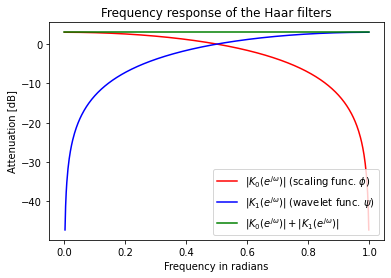

In [26]:
pylab.plot(w0/math.pi, 20 * np.log10(abs(scaling_function)), 'r', label="$|K_0(e^{j\omega})|$ (scaling func. $\phi$)")
pylab.plot(w1/math.pi, 20 * np.log10(abs(wavelet_function)), 'b', label="$|K_1(e^{j\omega})|$ (wavelet func. $\psi$)")
pylab.plot(w0/math.pi, 20 * np.log10(abs(scaling_function + wavelet_function)), 'g', label="$|K_0(e^{j\omega})|+|K_1(e^{j\omega})|$")
pylab.legend(loc='lower right')
pylab.title("Frequency response of the Haar filters")
pylab.xlabel("Frequency in radians")
pylab.ylabel("Attenuation [dB]")
pylab.savefig("haar_filters_response.svg")
pylab.savefig("haar_filters_response.pdf")
pylab.show()

In [27]:
# http://wavelets.pybytes.com/wavelet/db5/
K_0 = get_filter("db5", 0, 10)
K_1 = get_filter("db5", 1, 10)
print("K_0 =", K_0)
print("K_1 =", K_1)

K_0 = [-0.24229489 -0.03224487  0.07757149 -0.00624149 -0.01258075  0.00333573
  0.1601024   0.60382927  0.72430853  0.13842815]
K_1 = [ 0.72430853  0.13842815 -0.24229489 -0.03224487  0.07757149 -0.00624149
 -0.01258075  0.00333573  0.1601024   0.60382927]


/home/vruiz/.local/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 1 is too high: all coefficients will experience boundary effects.
  warnings.warn(
